In [2]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

electronicthermalPropsiso (generic function with 1 method)

In [3]:
Ts=collect(300.0:50:1200.1)
#Ts=collect(663.8:0.01:664.0)#[663.0,663.1]
numofn=[-1.5e20]#,-7.3e19,-2.0e19,-0.15e19]#,-0.2e20]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
numofnn=[1e17]#,1e17,1e17,1e17]#,1e17]
xs=[0.287]#,0.3,0.3,0.3]#[0.287,0.3,0.262,0.332]#collect(0.0:0.01:1.0)

var0=[Ts[1],xs[1]]
Eoff=5.0
Ev(var)=Eoff
Ec(var)=Ev(var)+EgSiGe(var[1],var[2]) #var[1]:T var[2]:x
alphanp=0.0#1/EgSiGe([Ts[1],xs[1]])


effMassV(var)=-1.2*me
effMassC(var)=0.427*me#0.321me#0.424*me#0.424*me#1.4/6^(2/3)*me

bandC=parBandTx(effMassC(var0),alphanp,Ec(var0),[Ec],[effMassC],var0)
bandV=parBandTx(effMassV(var0),0.0,Ev(var0),[Ev],[effMassV],var0)
#bndstTx=BandStrucTx([bandV,bandC,bandC,bandC,bandC,bandC,bandC],var0)
bndstTx=BandStrucTx([bandC,bandC,bandC,bandC,bandC,bandC,bandV],var0)#,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI var[10]:bandV

md=effMassC([Ts[1],xs[1]])*6^(2/3)#1.4*me;
function Deftemp(band::parBandTx)
    Da=8.0
    Dv=3.0
    if band==bandC
        return [Da,Dv]#10.5#15.0
    end
    if band==bandV        
        return [Dv,Da]#7.0
    end
end
ksi=21.0
tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[6])[1],Deftemp(var[6])[2],var[2],var[1],var[3],var[6])#DefP(var[1])
tauII2(var)=tauII2_func(ksi*eps0,eps0,var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(ksi*eps0,var[1],var[9])
vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
#vartau0=[bandC.effMass,Ts[1],1.0,xs[1],1.5,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2,tauAC,
xmax=3.0
#T_EF_Dict=Dict()
#println("-3")

3.0

In [4]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicPropsiso(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-Ec([iT,kx])
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end

 22.063971 seconds (69.88 M allocations: 21.756 GiB, 10.84% gc time)


In [5]:
Efsr/kBe/500

19×1×1 Array{Float64,3}:
[:, :, 1] =
  1.48624 
  1.40388 
  1.30806 
  1.1995  
  1.07892 
  0.947011
  0.804425
  0.651763
  0.489579
  0.318377
  0.138625
 -0.049241
 -0.244798
 -0.447607
 -0.657165
 -0.872833
 -1.09373 
 -1.31856 
 -1.54545 

In [21]:
#Efsr=map(x->(Efs[x,:,:]-5)/kBe/Ts[x],1:length(Ts))
#(Efs-5)/kBe/500

In [6]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############
thetaSiL=586.0 # K 
thetaSiT=240.0 # K
vSiL=8430.0    # m/s
vSiT=5840.0    # m/s
vGeL=4920.0    # m/s
vGeT=3540.0    # m/s
gammaL=0.9
gammaT=0.9
MSi=4.6637e-26 # kg
MGe=1.206e-25  # kg
VSi=2.0024e-29 #m3
VGe=2.2636e-29 #m3

Eep=5.0*q
xsp=xs[1]
Tp=300.0
p=1.0
D=20e-9
NP=0.0
a=1.0
alpha=0.5 #specularity factor
d=97.0e-9#

#println("1")


#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, xsp,
    thetaSiL, thetaSiT, thetaSiT, MSi,   MGe, 
    VSi, a, T_EF_Dict_Array, Eep, alpha, 
    d, thetaSiL, thetaSiT, vSiL, vSiT, 
    vGeL, vGeT, p, NP,Tsindex=1,
    numberofnindex=1,xsindex=1]
thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
#println("2")
tauPHNLf(var)=tauPH_NL(var[3],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeL_PH(var[5]))
tauPHNTf(var)=tauPH_NT(var[4],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeT_PH(var[5]))


tauPHULf(var)=tauPH_U(var[3],var[1],var[2],MSiGe(var[5]),vSiGeL_PH(var[5]),var[17])
tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],MSiGe(var[5]),vSiGeT_PH(var[5]),var[18])

tauPHALLLf(var)=tauPH_ALL(var[9],var[10],var[5],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeL_PH(var[5]))
tauPHALLTf(var)=tauPH_ALL(var[9],var[10],var[5],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeT_PH(var[5]))

tauPHeLf(var)=tauPH_e(var[14],md,MSiGe(var[5])/VSiGe(var[5]),(var[13][var[26],var[27]])[var[2]],var[1],var[2],
vSiGeL_PH(var[5]))
tauPHeTf(var)=tauPH_e(var[14],md,MSiGe(var[5])/VSiGe(var[5]),(var[13][var[26],var[27]])[var[2]],var[1],var[2],
vSiGeT_PH(var[5]))

tauPHBLf(var)=tauPH_B(vSiGeL_PH(var[5]),var[14],var[15])
tauPHBTf(var)=tauPH_B(vSiGeT_PH(var[5]),var[14],var[15])
#println("3")
tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHALLLf,tauPHeLf],vartauPH0)#,tauPH_eLf ,tauPHALLLf ,tauPHBLf
tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
tauPHRL=tau_phonon_B([tauPHULf,tauPHALLLf,tauPHeLf],vartauPH0) #,tauPHALLLf,tauPH_eLf] ,tauPHBLf


tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTf],vartauPH0) #tauPHALLTf,tauPH_eTf ,tauPHBTf
tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTf],vartauPH0) #,tauPHALLTf,tauPH_eTf ,tauPHBTf


tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTf],vartauPH0) #,tauPHALLTf,tauPH_eTf tauPHBTf
tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTy=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTf],vartauPH0) #,tauPHALLTf,tauPH_eTf ,tauPHBTf
#println("4")

tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
xmax=1.0

1.0

In [7]:
SiGe_SA_162_Bulk_KC_T2=[316.1300512139,339.4744149914,362.8181885196,386.1603880493,409.5019823392,432.8491156044,
456.1917086338,479.5343016631,502.8765011929,526.2187007226,549.5626710006,572.9062477789,596.2542579861,619.5928110862,
642.9357976151,666.2789808939,689.6269255178,712.9667902833,736.3081372305,759.6511237595,782.991552541,806.3289851042,
829.6769353495,853.0193316291,876.1484117754,899.6962916723,923.0457334685,946.3873427489,969.729148779,993.0705613095,
1016.4127608393,1038.1038360469,1063.0961761498,1086.4350309329,1109.7758532141,1133.119823492,1156.460842523,
1180.2265263224,1193.5942192882]

SiGe_SA_162_Bulk_KC_K2=[0.038212563,0.0379416779,0.0376824928,0.0374545079,0.0372385202,0.0369127377,0.0366769527,
0.0364411677,0.0362131828,0.0359851979,0.0357221128,0.0354668277,0.0351236623,0.0349679577,0.0347243727,0.0344768877,
0.0341350222,0.0339533175,0.0337422327,0.0334986477,0.0333057629,0.0331722699,0.032830293,0.032598408,0.032390684,
0.032289896,0.0319183533,0.0317020684,0.0314818835,0.0312694987,0.0310415138,0.030842846,0.030605044,0.0304433594,
0.0302426746,0.0299795895,0.0297750047,0.0295610983,0.0294507698]


39-element Array{Float64,1}:
 0.0382126
 0.0379417
 0.0376825
 0.0374545
 0.0372385
 0.0369127
 0.036677 
 0.0364412
 0.0362132
 0.0359852
 0.0357221
 0.0354668
 0.0351237
 ⋮        
 0.0317021
 0.0314819
 0.0312695
 0.0310415
 0.0308428
 0.030605 
 0.0304434
 0.0302427
 0.0299796
 0.029775 
 0.0295611
 0.0294508

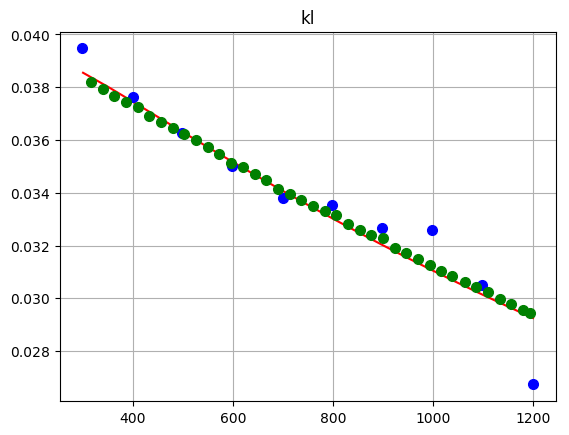

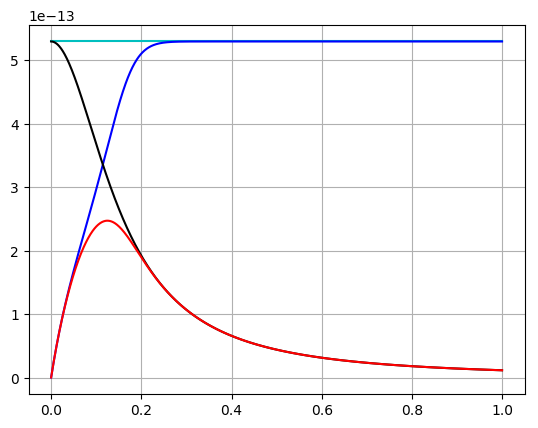

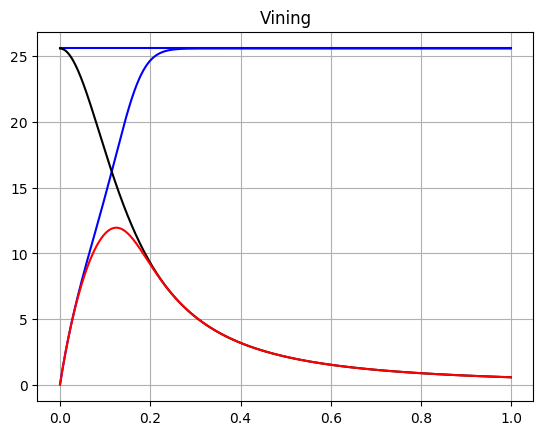

In [14]:
function tauPH_U_SAT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,
    theta::Float64,omegaD::Float64,beta::Float64,delta::Float64)
    #intx is different from x in oither phonon calculations intx=omega/omegaD
    Mcgs=M
    #println("Mcgs= ",Mcgs)
    deltacgs=delta*100
    #println("deltacgs= ",deltacgs)
    #println("1/Mcgs/deltacgs^2/(theta/T)= ",(1/Mcgs/deltacgs^2/(theta/T)))
    return 1./((3.264e-2)*((1+beta*(5/9))/(1+beta))*gamma^2.*intx.^2./Mcgs/deltacgs^2/(theta/T))    
end

function tauPH_EP_SAT(Eep::Float64,md::Float64,x::Array{Float64},Ef::Float64,
    T::Float64,M::Float64,theta::Float64,delta::Float64)
    eta=Ef#Ef*q/kB/T
    deltacgs=delta*100
    Mcgs=M
    A=6.76e26(md/me)^2*deltacgs^2/Mcgs
    y=3.72e9(md/me)*deltacgs^2*theta
    D=1.68e-11/(md/me)/deltacgs^2/theta
    alphat=thetaD/T
    #println("alphat ",alphat)
    lambda=6
    ex1=1+exp.(-alphat*y+eta-D*alphat*x.*x+alphat.*x/2)
    ex2=1+exp.(-alphat*y+eta-D*alphat*x.*x-alphat.*x/2)    
    ext=ex1./ex2
    logt=log.(ext)
    return 1./(lambda*(A*Eep^2/alphat).*logt) 
end

function tauPH_PD_SAT(GM::Float64,intx::Array{Float64},theta::Float64)
    return 1./(6.17e11*theta*GM.*intx.^4)
end

function tauPH_U_VT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,theta::Float64,
omegaD::Float64,beta::Float64,delta::Float64)#intx is different from x in oither phonon calculations intx=omega/omegaD
    bb=20*pi/3*hbar*6.02e23*(6*pi*pi/4)^(1/3)
    M=M/1000
    deltacgs=delta
    #println("bb ",bb)
    return 1./(bb*(1+beta*5/9)/(1+beta)*gamma^2/M/deltacgs^2*(T/theta)^3.*intx.^2)    
end

function tauPH_C_VT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,theta::Float64,
omegaD::Float64,beta::Float64,delta::Float64)#intx is different from x in oither phonon calculations intx=omega/omegaD
   tau_u=tauPH_U_VT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,theta::Float64,
omegaD::Float64,beta::Float64,delta::Float64)#intx is different from x in oither phonon calcu
    return tau_u#1./(1./(tau_u/beta)+1./tau_u)    
end
function tauPH_PD_VT(GM::Float64,Tt::Float64,intx::Array{Float64},vtt::Float64,delta::Float64)
    return 1./(GM/4/pi*(delta/vtt)^3*(kB*Tt/hbar)^4.*intx.^4)
end
function tauPH_EP_VT(Eep::Float64,md::Float64,x::Array{Float64},Ef::Float64,v::Float64,T::Float64,d::Float64)
    ts=md*v*v/(2*kB*T)
    Efst=Ef#*q/kB/T
    ex1=(1+exp.(-ts+Efst-x.*x/16/ts+x/2))
    ex2=(1+exp.(-ts+Efst-x.*x/16/ts-x/2))    
    return 1./((Eep^2*md^3*v)/(4*pi*hbar^4*d*ts).*log.(ex1./ex2))
end

function tauPH_eT(Eep::Float64,md::Float64,ro::Float64,Ef::Float64,x::Array{Float64},T::Float64,v::Float64)
    #Ef=Ef*q/kB/T
    beta=md*v^2/2/kB/T
    logp=log.((1+exp.(-beta+Ef-x.*x/(16*beta)+x/2))./(1+exp.(-beta+Ef-x.*x/(16*beta)-x/2)))
    return 4*pi*hbar^4*ro*beta./(Eep^2*md^3*v)./(logp) 
end
#
function I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1./((beta+1)./tauPH_U_SA_Af(x)+1./tauPH_EP_SA_Af(x)+1./tauPH_PD_SA_Af(x))
    
    integrand(x)=tauPH_C_SA_Af(x).*(x.^4)*alphat^2.*exp.(alphat*x)./(exp.(alphat*x)-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1./((beta+1)./tauPH_U_SA_Af(x)+1./tauPH_EP_SA_Af(x)+1./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x).*(x.^4)*alphat^2.*exp.(alphat*x)./(exp.(alphat*x)-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1./((beta+1)./tauPH_U_SA_Af(x)+1./tauPH_EP_SA_Af(x)+1./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*1./tauPH_U_SA_Af(x).*
    (1-beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x)).*(x.^4)*alphat^2.*exp.(alphat*x)./(exp.(alphat*x)-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function klt(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)    
    I1t=I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I2t=I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I3t=I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    return 4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)#(I1t+I2t.^2/I3t)#(kB*thetaD/hbar)^3*(I1t+I2t.^2/I3t)    #4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)    
end
###########################################################################################################
#

function I1V(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd) 
alphat=thetaD/Tt
    tauPH_U_V_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_U_VT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta) 
    #tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_V_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    #tauPH_EP_VT(Eep*q,mds,x,etha,vtt,Tt,dd)/6
    #tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_V_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    #tauPH_PD_VT(GM,Tt,x,vtt,delta)
    #tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_V_Af(x)=1./((beta+1)./tauPH_U_V_Af(x)+1./tauPH_EP_V_Af(x)+1./tauPH_PD_V_Af(x))
    
    integrand(x)=x#tauPH_C_V_Af(x)#.*(x.^4)#.*exp(x)./(exp(x)-1).^2
    
    nodes, weights = qnwlege(1000,0.0,alphat)
    return a= do_quad(integrand,nodes, weights)
   
end

function I2V(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)  
    tauPH_U_V_Af(x)=tauPH_U_VT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta) 
    #tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_V_Af(x)=tauPH_EP_VT(Eep*q,mds,x,etha,vtt,Tt,dd)/6
    #tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_V_Af(x)=tauPH_PD_VT(GM,Tt,x,vtt,delta)
    #tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_V_Af(x)=1./((beta+1)./tauPH_U_V_Af(x)+1./tauPH_EP_V_Af(x)+1./tauPH_PD_V_Af(x))
    
    integrand(x)=beta*tauPH_C_V_Af(x)./tauPH_U_V_Af(x).*(x.^4).*exp.(x)./(exp.(x)-1).^2    
    nodes, weights = qnwlege(1000,0.0,thetaD/Tt)
    return a= do_quad(integrand,nodes, weights)    
end

function I3V(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)  
   alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_VT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta) 
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_VT(Eep*q,mds,x,etha,vtt,Tt,dd)/6
    tauPH_PD_SA_Af(x)=tauPH_PD_VT(GM,Tt,x,vtt,delta)
    tauPH_C_SA_Af(x)=1./((beta+1)./tauPH_U_SA_Af(x)+1./tauPH_EP_SA_Af(x)+1./tauPH_PD_SA_Af(x))    
    integrand(x)=beta*1./tauPH_U_SA_Af(x).*
    (1-beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x)).*(x.^4).*exp.(x)./(exp.(x)-1).^2    
    nodes, weights = qnwlege(1000,0.0,alphat)
    return a= do_quad(integrand,nodes, weights)    
end
function I3tt(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1./((beta+1)./tauPH_U_SA_Af(x)+1./tauPH_EP_SA_Af(x)+1./tauPH_PD_SA_Af(x))    
    integrand(x)=beta*1./tauPH_U_SA_Af(x).*
    (1-beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x)).*(x.^4)*alphat^2.*exp.(alphat*x)./(exp.(alphat*x)-1).^2    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function kltV(gammaSA,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
    I1t=I1V(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
    I2t=I2V(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
    I3t=I3V(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
    return (I1t+I2t.^2/I3t)#(kB*Tt/hbar)^3*(I1t+I2t.^2/I3t)#kB^4*Tt^3/2/pi/pi/hbar^3/vtt*(I1t+I2t.^2/I3t)    
end

###########################################################################################################

xxsp=71.3
xsp=(100-xxsp)/100
Eep=4.7
etha=0.96
thetaD=524.0#524.0
#gammaSA,GM,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha

Tt=thetaD
gammaSA=0.92
beta=2.0

eps=39
deltaSi=VSi^(1/3)
deltaGe=VGe^(1/3)
delta=deltaSi*(1-xsp)+deltaGe*xsp
deltacgs=delta*100
V=VSi*(1-xsp)+VGe*xsp
MSiGecgs(xsp)=28.084*(1-xsp)+xsp*72.64
G=1.033*(1-xsp)+1.017*xsp

a3=(2.7155^3)*(1-xsp)+(2.8288^3)*xsp
a1=a3^(1/3)
vtt=kB/hbar*(6*pi*pi)^(-1/3)*thetaD*delta
dd=(4.66e-26*(1-xsp)+1.206e-25*xsp)/(2e-29*(1-xsp)+2.2636e-29*xsp)

delMSiGe=28.084-72.64
deldelta=deltaSi-deltaGe
GM=xsp*(1-xsp)*((delMSiGe/MSiGecgs(xsp))^2+eps*(deldelta/delta)^2)

omegaD=thetaD*kB/hbar
int=collect(0.0001:0.001:1.0) # int=hbar*omega/kB/T
intx=int.*Tt/thetaD

mds=0.427*me#0.427*me
vt=5880.0
#println("deltaSi ",deltaSi,"    deltaGe ",deltaGe)

tauPH_U_SA_A=Array{Float64,1}(length(intx))

tauPH_U_SA_A=tauPH_U_SAT(gammaSA,intx,Tt,MSiGecgs(xsp),thetaD,omegaD,beta,delta)
tauPH_C_SA_A=tauPH_U_SA_A/(1+beta)

tauPH_U_V_A=tauPH_U_VT(gammaSA,int,Tt,MSiGecgs(xsp),thetaD,omegaD,beta,delta)
tauPH_EP_V_A=tauPH_EP_VT(Eep*q,mds,int,etha,vtt,Tt,dd)/6
tauPH_C_V_A=tauPH_U_V_A/(beta+1) #tauPH_C_VT(gammaSA,int,Tt,MSiGecgs(xsp),thetaD,omegaD,beta,delta)
#plot(intx,tauPH_U_SA_A.*intx.^2,Linestyle="-",color="k")


tauPH_EP_SA_A=tauPH_EP_SAT(Eep,mds,intx,etha,Tt,MSiGecgs(xsp),thetaD,delta)
tauPH_PD_SA_A=tauPH_PD_SAT(GM,intx,thetaD)
tauPH_CUNEP_SA_A=1./(1./tauPH_C_SA_A+1./tauPH_EP_SA_A)
tauPH_CUNPD_SA_A=1./(1./tauPH_C_SA_A+1./tauPH_PD_SA_A)
tauPH_CUNPDEP_SA_A=1./(1./tauPH_C_SA_A+1./tauPH_PD_SA_A+1./tauPH_EP_SA_A)
tauPH_e_A=tauPH_eT(Eep*q,mds,dd,etha,int,Tt,vtt)/6

Ttt=300.0
I1_SA_A=I1(gammaSA,GM,Ttt,MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha)#*(kB*thetaD/hbar)^3
I1_V_A=I1V(gammaSA,GM,Tt,MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)*(thetaD/Ttt)^4#*(kB*Ttt/hbar)^3
I2_SA_A=I2(gammaSA,GM,Ttt,MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha)#*(kB*thetaD/hbar)^3
I2_V_A=I2V(gammaSA,GM,Tt,MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)*(thetaD/Ttt)^2#*(kB*Ttt/hbar)^3
I3_SA_A=I3(gammaSA,GM,Ttt,MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha)#*(kB*thetaD/hbar)^3
I3_V_A=I3V(gammaSA,GM,Tt,MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)*(thetaD/Ttt)^2#*(kB*Ttt/hbar)^3

Tts=collect(300.0:50:1200.0)#[300.0,500.0,800.0]
klt_SA_A=Array{Float64,1}(length(Tts))

klt_V_A=Array{Float64,1}(length(Tts))
Efqq=[3.0,2.5,2.0,1.5,1.0,0.9,0.8,0.2,0.1,0.05,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01]
for Tti in 1:length(Tts)
    klt_SA_A[Tti]=klt(gammaSA,GM,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,
        Efsr[Tti,1,1]/kBe/Tts[Tti])
    klt_V_A[Tti]=kltV(gammaSA,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)*(thetaD/Ttt)^2    
end

SiGe_SA_162_Bulk_KC_T=[298.201949929,399.8236245162,498.0843662731,598.5351036206,698.9858409681,797.1240997501,
897.5356425457,997.8589975993,1097.300475234,1199.132820538]
SiGe_SA_162_Bulk_KC_KL=[0.0394665342,0.0376127718,0.0362474716,0.0350157828,0.033784094,0.0335298893,0.0326537511,
0.0325776017,0.0305013403,0.0267364936]

figure()
title("kl")
plot(Tts,klt_SA_A,Linestyle="-",color="r")
#plot(Tts,klt_V_A,Linestyle="-",color="b")
plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")

#ylim(0.025,0.075)
grid()

#figure()
#title("Vinnig EP")
#plot(intx,tauPH_EP_V_A.*intx.^2,Linestyle="-",color="c")
#plot(intx,tauPH_EP_SA_A.*intx.^2,Linestyle="-",color="k")
#plot(intx,tauPH_e_A.*intx.^2,Linestyle="-",color="y")
#plot(int,tauPH_EP_V_A,Linestyle="-",color="c")
#plot(intx,tauPH_EP_SA_A,Linestyle="-",color="k")
#grid()

figure()
plot(intx,tauPH_C_SA_A.*intx.^2,Linestyle="-",color="c")
plot((intx),tauPH_CUNEP_SA_A.*(intx).^2,Linestyle="-",color="b")
plot((intx),tauPH_CUNPD_SA_A.*(intx).^2,Linestyle="-",color="k")
plot((intx),tauPH_CUNPDEP_SA_A.*(intx).^2,Linestyle="-",color="r")

#ylim(0.0,7e-13)
grid()

figure()
title("Vining")
kk=1e10*vtt
#plot((intx),kk*tauPH_C_V_A.*(intx).^2,Linestyle="-",color="b")
plot((intx),kk*tauPH_C_SA_A.*(intx).^2,Linestyle="-",color="b")
plot((intx),kk*tauPH_CUNEP_SA_A.*(intx).^2,Linestyle="-",color="b")
plot((intx),kk*tauPH_CUNPD_SA_A.*(intx).^2,Linestyle="-",color="k")
plot((intx),kk*tauPH_CUNPDEP_SA_A.*(intx).^2,Linestyle="-",color="r")
#ylim(0.0,12)
grid()

#figure()
#plot((intx),tauPH_EP_SA_A.*(intx).^2,Linestyle="-",color="b")
#grid()

#figure()
#plot((intx),tauPH_CUNEP_SAT_A.*(intx).^2,Linestyle="-",color="b")
#ylim(0.0,7e-13)
#grid()

In [26]:
Efsr[:,1,1]

19-element Array{Float64,1}:
  0.0564473 
  0.0519007 
  0.0466494 
  0.0407281 
  0.0341707 
  0.0270093 
  0.0192739 
  0.0109918 
  0.00218812
 -0.00711403
 -0.0168934 
 -0.0271299 
 -0.0378035 
 -0.0488931 
 -0.0603728 
 -0.072208  
 -0.0843478 
 -0.0967154 
 -0.109195  